# E-commerce product analysis

### Описание проекта

**Цель проекта** - улучшить работу интернет-магазина «Пока все ещё тут» для удовлетворения потребностей клиентов в обустройстве дома.

**Основная задача** - выявление профилей покупателей и сегментация покупателей по профилю потребления.

Для этого требуется выполнить **следующие шаги**:
- Загрузить данные и изучить общую информацию о датасете;
- Выполнить предобработку данных;
- Провести исследовательский анализ данных;
- Сегментировать покупателей на основе истории их покупок; 
- Сформулировать и проверить статистические гипотезы.

**1. Предобработка данных**:
- Выявление и удаление дубликатов, в том числе неявных (при необходимости);
- Выявление и удаление/заполнение пропусков (при необходимости);
- Выявление и удаление аномалий (при необходимости);
- Преобразование данных типа даты и времени;
- Проверить корректность наименований колонок, переименовать колонки (при необходимости).

**2. Исследовательский анализ данных**:

- Вычислить помесячную выручку;
- Определить значения чеков по месяцам;
- Определить общее количество заказов по месяцам;
- Определить количество заказов на покупателя по месяцам;
- Выявить зависимость количества совершенных заказов от их общей суммы;
- Сформировать столбец с категориями товаров (растения, рассада и товары для дома);
- Определить количество проданных товаров по категориям;
- Определить соотношение проданных категорий товаров в ходе времени;
- Выделить ТОП-15 товаров по категориям по общему количеству проданных товаров;
- Выделить ТОП-15 товаров по категориям по частоте присутствия в заказах.

**3. Сегментировать покупателей на основе истории их покупок**:

- Сформировать сегменты с помощью RFM-метода на основе группировки покупателей по истории их транкзаций: давности, частоты покупок и потраченных средств на покупки.

**4. Сформулировать и проверить статистические гипотезы**

## Загрузка данных и изучение общей информации

In [1]:
# импорт библиотек
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from scipy import stats
import math
import warnings 

In [2]:
# сохранение таблицы csv в переменную
data = pd.read_csv('/datasets/ecommerce_dataset.csv')

In [3]:
# вывод 5 первых строк датафрейма
data.head(5) 

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [4]:
# вывод информации о датафрейме
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


In [5]:
# вывод описания данных датафрейма
data.describe() 

,date,order_id,quantity,price
count,6.737000e+03,6737.000000,6737.000000,6737.000000
mean,2.018855e+09,43128.948345,2.501559,462.028499
std,3.855185e+05,27899.414662,15.266478,871.296064
min,2.018100e+09,12624.000000,1.000000,9.000000
25%,2.019020e+09,14827.000000,1.000000,101.000000
50%,2.019050e+09,68503.000000,1.000000,135.000000
75%,2.019061e+09,70504.000000,1.000000,398.000000
max,2.019103e+09,73164.000000,1000.000000,14917.000000


<div class="alert alert-info">
    
**📝 Комментарий Маши**
    
Изучив данные, можно выделить основные аспекты:
- в датафрейме 6 столбцов и 6737 строк
- столбец с датой и временем нуждается в конвертации из числового типа в тип даты
- среднее значение количества товара - 2.5, медиана - 1, более 75% значений равно 1
- среднее значение цены товара равно 462, медиана - 135, более 75% значений равно или ниже 398.
    
</div>

## Предобработка данных

- Преобразование данных типа даты и времени;

In [6]:
# преобразование типа столбца с датой и временем
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H') 

In [7]:
# вывод первой даты
data['date'].min() 

Timestamp('2018-10-01 00:00:00')

In [8]:
# вывод последней даты
data['date'].max() 

Timestamp('2019-10-31 16:00:00')

<div class="alert alert-info">
    
**📝 Комментарий Маши**
    
Преобразовали тип данных столбца с датой и временем на корректный и выявили период исследований (2018-10-01 00:00:00 - 2019-10-31 16:00:00);
    
</div>

- Выявление и удаление дубликатов, в том числе неявных (при необходимости);

In [9]:
# подсчет дубликатов
data.duplicated().sum() 

0

In [10]:
# подсчет уникальных значений столбца с наименованиями товаров
data['product'].nunique() 

2343

In [11]:
# перевод в нижний регистр столбца с названиями
data['product'] = data['product'].str.lower() 

# поиск неявных дубликатов 
data[data.duplicated(subset=['date', 'customer_id', 'product', 'quantity', 'price'], keep=False)] 

,date,customer_id,order_id,product,quantity,price
1055,2018-12-02 15:00:00,036118cf-c198-48fa-ba15-6d841482a56d,69175,салатник воларэ блэк 16 см g9403 luminarc,6,97.0
1056,2018-12-02 15:00:00,036118cf-c198-48fa-ba15-6d841482a56d,69175,тарелка суповая воларэ блэк 23 см g9402 luminarc,3,127.0
1057,2018-12-02 15:00:00,036118cf-c198-48fa-ba15-6d841482a56d,69176,салатник воларэ блэк 16 см g9403 luminarc,6,97.0
1058,2018-12-02 15:00:00,036118cf-c198-48fa-ba15-6d841482a56d,69176,тарелка суповая воларэ блэк 23 см g9402 luminarc,3,127.0
1105,2018-12-04 19:00:00,b2da4ddc-71b5-499b-9806-d59c7a7e6cf5,69207,чайник электрический василиса т33-2000 нержаве...,1,749.0
1106,2018-12-04 19:00:00,b2da4ddc-71b5-499b-9806-d59c7a7e6cf5,69208,чайник электрический василиса т33-2000 нержаве...,1,749.0
1486,2019-01-12 11:00:00,364754b9-56fd-49b5-b6fb-d1fca7ca82f9,69795,гладильная доска ника lora fashion hlf 123х46 см,1,1912.0
1487,2019-01-12 11:00:00,364754b9-56fd-49b5-b6fb-d1fca7ca82f9,69796,гладильная доска ника lora fashion hlf 123х46 см,1,1912.0
1526,2019-01-16 15:00:00,fb2f95f0-1f30-4e6a-a75c-92d1e2d341e3,69850,"сушилка для белья на батарею, сб5-45, ника",1,134.0
1527,2019-01-16 15:00:00,fb2f95f0-1f30-4e6a-a75c-92d1e2d341e3,69851,"сушилка для белья на батарею, сб5-45, ника",1,134.0


In [12]:
# удаление неявных дубликатов
data = data.drop_duplicates(subset=['date', 'customer_id', 'product', 'quantity', 'price'], keep='first') 

# перендексация датафрейма
data = pd.concat([data], ignore_index=True) 

In [13]:
# подсчет уникальных значений столбца с наименованиями товаров
data['product'].nunique() 

2341

<div class="alert alert-info">
    
**📝 Комментарий Маши**
    
Явных дубликатов нет; удалили строки с неявными дубликатами (повторы по дате, идентификатору пользователя, наименованию товара, кол-ву и цене), т.к. велика вероятность ошибочного ввода и создания повторного заказа. При переводе наименований товаров в нижний регистр было уменьшение уникальных значений с 2343 до 2341.
    
</div>

- Выявление и удаление/заполнение пропусков (при необходимости);

In [14]:
# подсчет пропусков
data.isna().sum() 

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

- Выявление и удаление аномалий (при необходимости);

In [15]:
# вывод датафрейма с фильтрацией по кол-ву товара больше 50
data.query('quantity > 50') 

,date,customer_id,order_id,product,quantity,price
13,2018-10-01 15:00:00,0948b0c2-990b-4a11-b835-69ac4714b21d,68486,крючок одежный 2-х рожковый серый металлик с п...,96,38.0
160,2018-10-09 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68580,"стяжка оконная с болтом ст-55 цинк, 1108354",64,19.0
211,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"крепеж для пружины дверной, 1107055",150,19.0
212,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,пружина дверная 240 мм оцинкованная (д-19 мм) ...,150,38.0
266,2018-10-16 08:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"крепеж для пружины дверной, 1107055",150,19.0
267,2018-10-16 08:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,пружина дверная 240 мм оцинкованная (д-19 мм) ...,150,38.0
568,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,муляж яблоко 9 см красное,170,51.0
586,2018-11-02 11:00:00,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,муляж яблоко 9 см красное,140,59.0
1023,2018-11-29 17:00:00,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,69156,набор ножей attribute chef 5 предметов akf522,64,457.0
1101,2018-12-04 17:00:00,7d255526-fcc2-4f79-b28a-217d7d2373a8,69206,"щетка для посуды *оля*, мультипласт 1807010",100,26.0


In [16]:
# вывод датафрейма с фильтрацией по цене выше 5000
data.query('price > 5000') 

,date,customer_id,order_id,product,quantity,price
98,2018-10-04 17:00:00,d1a13243-9111-454f-848c-dcce0958528c,68529,сумка-тележка хозяйственная andersen scala sho...,1,5024.0
596,2018-11-02 17:00:00,305c9634-ec53-46be-af05-48ee8bd790a5,68836,сумка-тележка хозяйственная andersen scala sho...,1,5249.0
634,2018-11-05 02:00:00,639c4989-b0ab-412a-b7ec-be394cb2d372,68856,сумка-тележка хозяйственная rolser imx005 mare...,1,6007.0
654,2018-11-05 22:00:00,fc333417-1d11-4a2a-b946-0957ae0603e9,68872,сумка-тележка хозяйственная rolser mou041 malv...,1,7597.0
655,2018-11-05 22:00:00,639c4989-b0ab-412a-b7ec-be394cb2d372,68871,сумка-тележка хозяйственная rolser imx005 mare...,1,6007.0
768,2018-11-11 18:00:00,06e2fc7e-6183-4419-ada4-3b976baeed92,68952,коврик для ванной комнаты gobi полиэстер 120х7...,1,5474.0
1113,2018-12-06 08:00:00,fa471f6f-1442-490c-acc6-a47b0822098c,69226,сумка-тележка хозяйственная andersen scala sho...,1,5249.0
1118,2018-12-06 17:00:00,82b56a76-0dc9-4dae-aa76-863a9a80f082,69236,покрывало жаккард karna стеганое kalven 260x26...,1,6134.0
1119,2018-12-06 17:00:00,fa471f6f-1442-490c-acc6-a47b0822098c,69226,сумка-тележка хозяйственная andersen scala sho...,1,5249.0
1177,2018-12-12 11:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,69320,сумка-тележка хозяйственная andersen treppenst...,1,5662.0


In [17]:
# вывод датафрейма с фильтрацией по кол-ву больше 50
data.query('quantity >50') 

,date,customer_id,order_id,product,quantity,price
13,2018-10-01 15:00:00,0948b0c2-990b-4a11-b835-69ac4714b21d,68486,крючок одежный 2-х рожковый серый металлик с п...,96,38.0
160,2018-10-09 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68580,"стяжка оконная с болтом ст-55 цинк, 1108354",64,19.0
211,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"крепеж для пружины дверной, 1107055",150,19.0
212,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,пружина дверная 240 мм оцинкованная (д-19 мм) ...,150,38.0
266,2018-10-16 08:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"крепеж для пружины дверной, 1107055",150,19.0
267,2018-10-16 08:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,пружина дверная 240 мм оцинкованная (д-19 мм) ...,150,38.0
568,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,муляж яблоко 9 см красное,170,51.0
586,2018-11-02 11:00:00,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,муляж яблоко 9 см красное,140,59.0
1023,2018-11-29 17:00:00,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,69156,набор ножей attribute chef 5 предметов akf522,64,457.0
1101,2018-12-04 17:00:00,7d255526-fcc2-4f79-b28a-217d7d2373a8,69206,"щетка для посуды *оля*, мультипласт 1807010",100,26.0


In [18]:
# удаление из датафрейма аномалии с вантузами 
data = data.loc[data['quantity'] != 1000]

<div class="alert alert-info">
    
**📝 Комментарий Маши**
    
Пропусков нет. 

При изучении выбивающихся (аномальных) значений по количеству и ценам товаров было принято решение удалить строку с заказом 1000 вантузов, т.к. вероятно, это баг.


</div>

## Исследовательский анализ данных

- Подготовка данных и создание датасета;

In [19]:
# создание датафрейма по выручке
purchase = data[['date', 'order_id', 'price']] 

# группировка по дате и идентификатору покупателя с суммой покупок
purchase = purchase.groupby(['date', 'order_id'])['price'].agg('sum').reset_index() 

# вывод таблицы
purchase

,date,order_id,price
0,2018-10-01 00:00:00,68477,1037.0
1,2018-10-01 08:00:00,68478,269.0
2,2018-10-01 08:00:00,68479,824.0
3,2018-10-01 09:00:00,68480,674.0
4,2018-10-01 11:00:00,68483,82.0
...,...,...,...
3395,2019-10-31 11:00:00,73156,404.0
3396,2019-10-31 12:00:00,73158,1087.0
3397,2019-10-31 13:00:00,73162,157.0
3398,2019-10-31 14:00:00,73164,397.0


In [20]:
# преобразование даты в вид "месяц-год"
purchase['date'] = purchase['date'].dt.to_period("M") 

# преобразование типа столбца в строковый
purchase['date'] = purchase['date'].astype(str) 

# преобразование типа столбца в тип даты
purchase['date'] = pd.to_datetime(purchase['date']) 

- Вычислить помесячную выручку;


In [21]:
# создание гистограммы по общей выручке
fig = px.histogram(purchase, x='date', y='price', title = 'Выручка интернет-магазина «Пока все ещё тут» по месяцам', histfunc='sum', \
             labels={'date':'месяц', 'price':'выручка'}) 

# установка расстояния между столбцами
# fig.update_layout(bargap=0.2) 

# вывод графика
# fig.show() 

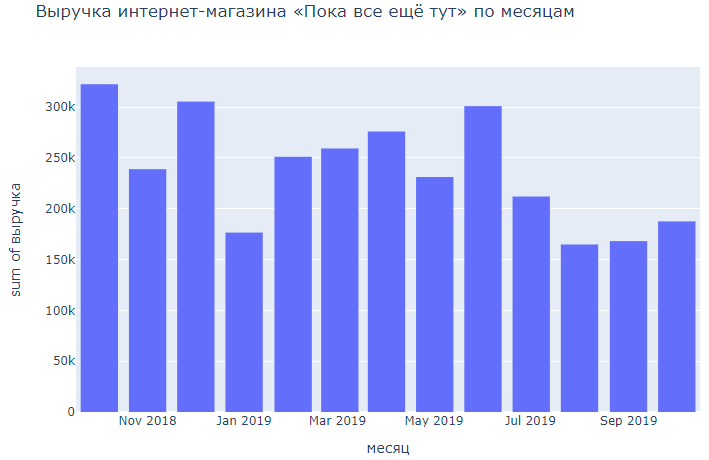

<div class="alert alert-info">
    
**📝 Комментарий Маши**
    
Наиболее высокая выручка наблюдалась в октябре 2018 и составляла 322573, низкая - в августе 2019 (164872).
    
    
</div>

- Определить значения чеков по месяцам;

In [22]:
# создание графика "ящик с усами" по денежной сумме заказов
fig = px.box(purchase, x='date', y='price', title='Сумма заказов интернет-магазина «Пока все ещё тут» по месяцам',\
             labels={'date':'месяц', 'price':'сумма'}) 

# вывод графика
# fig.show() 

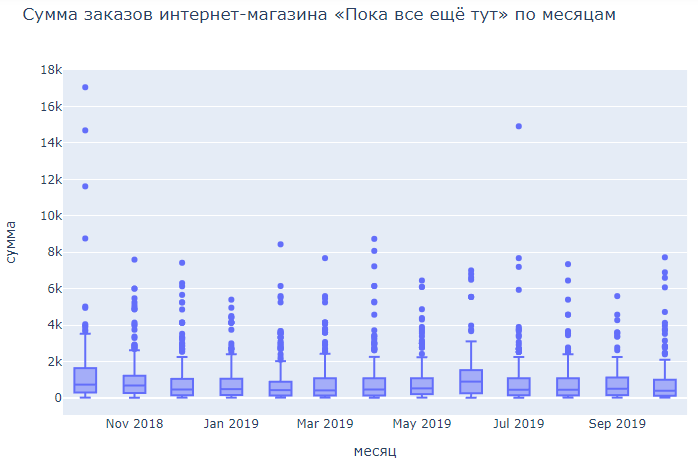

<div class="alert alert-info">
    
**📝 Комментарий Маши**
    
Также в октябре 2018 был сделан заказ самым высоким значением чека - 1706 при средней (медиане) - 734;
    
    
</div>

- Подготовка данных и создание датасета;

In [23]:
# создание таблицы по числу заказов
count = data[['date', 'customer_id', 'order_id']] 

#группировка по дате и идентификатору покупателя по кол-ву покупок
count = count.groupby(['date', 'customer_id'])['order_id'].agg('nunique').reset_index() 

#вывод таблицы
count.describe() 

,order_id
count,3349.000000
mean,1.015527
std,0.128395
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


In [24]:
# преобразование даты в вид "месяц-год"
count['date'] = count['date'].dt.to_period("M") 

# преобразование типа столбца в строковый
count['date'] = count['date'].astype(str) 

# преобразование типа столбца в тип даты
count['date'] = pd.to_datetime(count['date']) 

- Определить общее количество заказов по месяцам;

In [25]:
# построение гистограммы по общему кол-ву заказов
fig = px.histogram(count, x='date', y='order_id', title = 'Общее количество заказов интернет-магазина «Пока все ещё тут» по месяцам', histfunc='sum', \
             labels={'date':'месяц', 'order_id':'количество заказов'}) 

# установка расстояния между столбцами
# fig.update_layout(bargap=0.2) 

# вывод графика
# fig.show() 

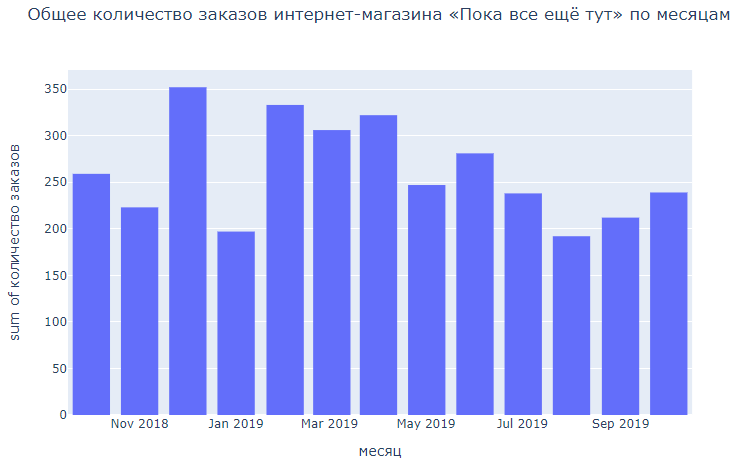

<div class="alert alert-info">
    
**📝 Комментарий Маши**
    
В декабре, феврале, марте и апреле поступило более 300 заказов. Наибольшее количество заказов было обработано в декабре 2018 (352), наименьшее - в январе 2019 (197);
    
</div>

- Определить количество заказов на покупателя по месяцам;

In [26]:
# создание графика "ящик с усами" по кол-ву заказов
fig = px.box(count, x='date', y='order_id', title='Количество заказов на одного покупателя по месяцам',\
             labels={'date':'месяц', 'order_id':'количество заказов'}) 

# вывод графика
# fig.show() 

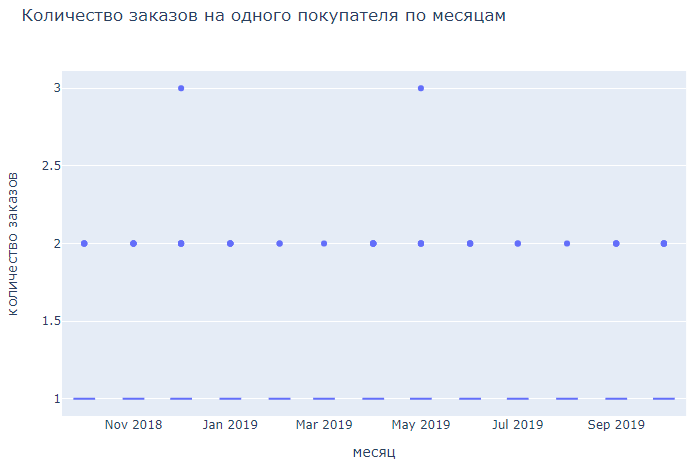

<div class="alert alert-info">
    
**📝 Комментарий Маши**
    
В мае и декабре один покупатель совершил 3 заказа, в то время как обычное количество заказов в месяц - 1.

    
</div>

- Подготовка данных и создание датасета;

In [27]:
#создание таблицы, сгруппированной по идентификаторам покупателей с кол-вом покупок и суммой заказов
customers = data.groupby('customer_id')['order_id', 'price'].agg({'order_id':'nunique', 'price':'sum'}).reset_index() 

#вывод таблицы
customers 

/tmp/ipykernel_177/1854403275.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,customer_id,order_id,price
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1,555.0
1,001cee7f-0b29-4716-b202-0042213ab038,1,442.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,1,457.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,1,1649.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1,1162.0
...,...,...,...
2445,ff601403-b094-4b86-9ac6-264d725b9277,1,1649.0
2446,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,1,1191.0
2447,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,1,778.0
2448,ffb80538-3fda-4351-8ea9-9d2bec58bb07,1,974.0


- Выявить зависимость количества совершенных заказов от общей их суммы;

In [28]:
# создание точечного графика зависимости
fig = px.scatter(customers,            
                 x='order_id', 
                 y='price'  
                 ) 

# оформление графика
# fig.update_layout(title='Зависимость количества заказов от их стоимости',
                    # xaxis_title='количество заказов',
                    # yaxis_title='сумма покупок') 

# вывод графика
# fig.show() 

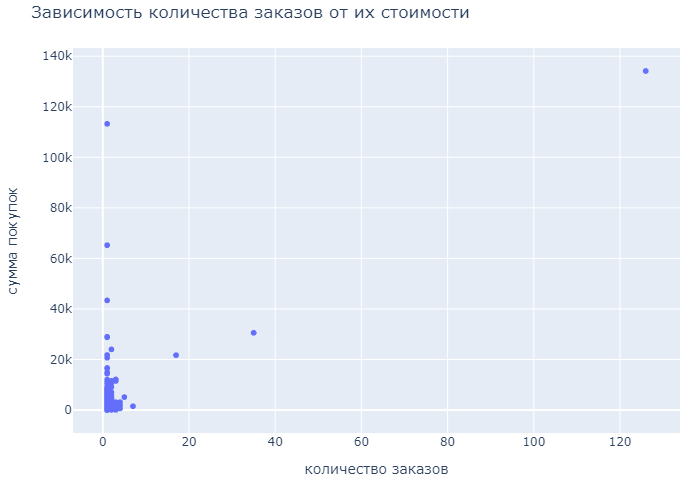

In [29]:
# вывод коэффициента корреляции между кол-вом заказов и потраченной суммой покупателей
customers['order_id'].corr(customers['price']) 

0.6400322785563884

<div class="alert alert-info">
    
**📝 Комментарий Маши**
    
Существует заметная (умеренная) зависимость количества заказов от общей суммы заказов.
 
</div>

- Сформировать столбец с категориями товаров (растения, рассада и товары для дома);

In [30]:
# создание нового датафрейма для категоризации наименований товаров
cat = data.copy() 

In [31]:
# создание столбца категорий товаров
cat['category'] = np.where(cat['product'].str.contains('растение'), 
                            'растение',
                  np.where(cat['product'].str.contains('муляж'), 
                            'товары для дома',
                  np.where(cat['product']
                            .str.contains('рассада'),
                            'рассада',
                  np.where(cat['product']
                            .str.contains('d-'),
                            'растение',
                  np.where(cat['product']
                            .str.contains('объем'),
                            'растение',
                  np.where(cat['product']
                            .str.contains('пеларгония'),
                            'растение',
                            'товары для дома'
             )
    )
                          ) ) ) ) 

In [32]:
# вывод последних строк
cat.tail(10) 

,date,customer_id,order_id,product,quantity,price,category
6709,2019-10-30 21:00:00,b24b3075-bbb5-498c-add9-534a727f3c33,73151,герань домашняя (пеларгония зональная) цветуща...,2,157.0,растение
6710,2019-10-31 00:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"таз пластмассовый со стиральной доской (иж), 1...",1,397.0,товары для дома
6711,2019-10-31 02:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"таз пластмассовый со стиральной доской (иж), 1...",1,397.0,товары для дома
6712,2019-10-31 09:00:00,6ddd4081-515e-401a-9567-8c0eab6dc868,73154,литопс микс d-5 см,1,112.0,растение
6713,2019-10-31 11:00:00,f17ed857-178e-45e1-a662-0a9dd3b58c5f,73155,мимоза стыдливая d-9 см,1,329.0,растение
6714,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"таз пластмассовый 40,0 л пищевой овальный (иж)...",1,404.0,товары для дома
6715,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома
6716,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,герань домашняя (пеларгония зональная) цветуща...,1,157.0,растение
6717,2019-10-31 14:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"таз пластмассовый со стиральной доской (иж), 1...",1,397.0,товары для дома
6718,2019-10-31 16:00:00,344aa778-e436-419e-a9c6-9b8f37b7c1df,73137,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,товары для дома


- Определить количество проданных товаров по категориям;

In [33]:
# подготовка таблицы для круговой диаграммы
df_cat = pd.DataFrame(cat['category'].value_counts()).reset_index() 

# создание круговой диаграммы
fig = go.Figure(data=[go.Pie(labels=df_cat['index'], 
                             values=df_cat['category'], 
                             pull = [0.1, 0])]) 

# оформление графика
# fig.update_layout(title='Общее количество проданных товаров по категориям', 
                    # width=800, 
                    # height=600) 

# вывод графика
# fig.show()

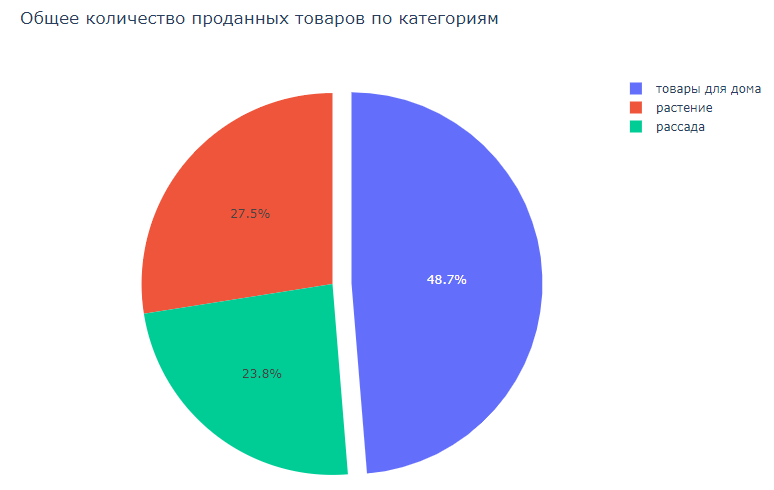

<div class="alert alert-info">
    
**📝 Комментарий Маши**
    
Лидирующую позицию по востребованности занимает категория "товары для дома" (48.7%), растения и рассада были проданы в близких процентных соотношениях (27,5% и 23,8%).
    
</div>

- Определить соотношение проданных категорий товаров в ходе времени;

In [34]:
# преобразование даты в вид "месяц-год"
cat['date'] = cat['date'].dt.to_period("M") 

# преобразование типа столбца в строковый
cat['date'] = cat['date'].astype(str)

# преобразование типа столбца в тип даты
cat['date'] = pd.to_datetime(cat['date']) 

In [35]:
# создание таблицы с группровкой по дате и категориям с количеством проданных товаров
category_stack = cat.groupby(['date', 'category'])['product'].agg('count').reset_index()

# вывод первых пяти строк
category_stack.head(5)

,date,category,product
0,2018-10-01,рассада,31
1,2018-10-01,растение,136
2,2018-10-01,товары для дома,400
3,2018-11-01,рассада,21
4,2018-11-01,растение,101


In [36]:
# создание столбчатой диаграммы со стеками по категориям
fig = px.bar(category_stack, x='date', y='product', color="category") 

# оформление графика
# fig.update_layout(barmode='stack', barnorm = "percent",   
                    # title='Соотношение проданных товаров по категориям помесячно', 
                    # xaxis_title='месяц',
                    # yaxis_title='%') 

# вывод графика
# fig.show() 

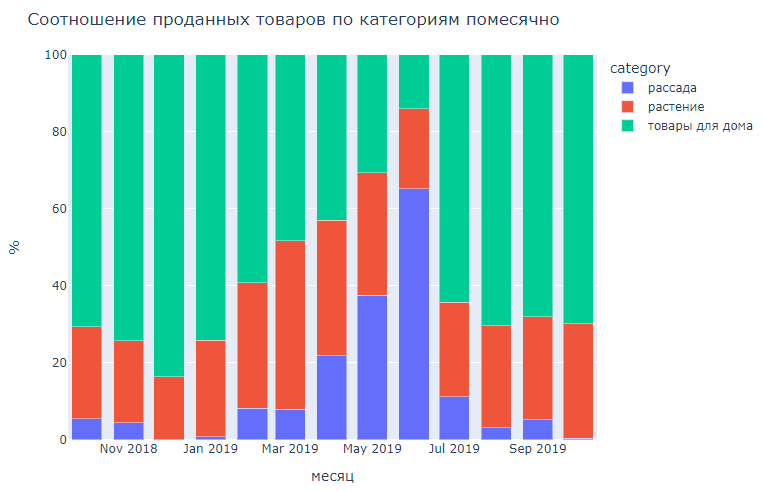

<div class="alert alert-info">
    
**📝 Комментарий Маши**
    
Рассада наиболее продаваема в посевное время (май, июнь), а продажи растений высоки в весеннее время года. Товары для дома пользуются популярностью круглый год, сдавая позиции к весне.
    
    
</div>

- Выделить ТОП-15 товаров по категориям по общему количеству проданных товаров

In [37]:
# создание таблицы с группровкой по наименованиям товаров и категориям с количеством проданных товаров
cat_count = cat.groupby(['product', 'category'])['quantity'].agg('sum').sort_values(ascending=False).reset_index() 

# вычленение строк категории "растение"
cat_count1 = cat_count.query('category == "растение"').head(15) 

# вычленение строк категории "рассада"
cat_count2 = cat_count.query('category == "рассада"').head(15)

# вычленение строк категории "товары для дома
cat_count3 = cat_count.query('category == "товары для дома"').head(15) 

# объединение строк в единую таблицу
top_15_quant = cat_count1.append(cat_count2) 

# объединение строк в единую таблицу
top_15_quant = top_15_quant.append(cat_count3) 

# вывод топ-15 товаров по категориям
top_15_quant 

,product,category,quantity
20,пеларгония розебудная red pandora укорененный ...,растение,94
27,однолетнее растение петуния махровая в кассете...,растение,82
42,пеларгония розебудная prins nikolai укорененны...,растение,73
43,пеларгония зональная диам. 12 см красная махровая,растение,73
44,пеларгония зональная диам. 12 см сиреневый пол...,растение,71
52,пеларгония розебудная margaretha укорененный ч...,растение,60
65,пеларгония розебудная mary укорененный черенок,растение,49
69,спатифиллум шопен d-12 см,растение,46
73,пеларгония розебудная queen ingrid укорененный...,растение,41
76,пеларгония зональная махровая лососевая,растение,38


In [38]:
# построение графика со стеками товаров по категориям
fig = px.bar(top_15_quant, x='quantity', y='category', orientation='h', color="product") 

# оформление графика
# fig.update_layout(barmode='stack',    
                    # title='ТОП-15 товаров по категориям (по общему количеству)', 
                    # xaxis_title='количество товаров',
                    # yaxis_title='категория', showlegend=False) 

# вывод графика
# fig.show() 

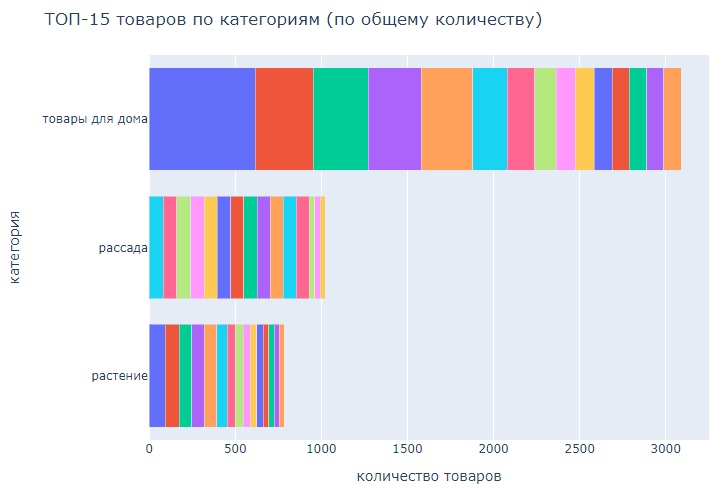

<div class="alert alert-info">
    
**📝 Комментарий Маши**
    
Наиболее популярные товары по общему количеству продаж в категории "товары для дома" - муляж яблоко, вешалки 3 шт. и пружины дверные; "рассада" - рассады кабачка; "растение" - пеларгония и петуния.
    
</div>

- Выделить ТОП-15 товаров по категориям по частоте присутствия в заказах

In [39]:
# создание таблицы с группровкой по наименованиям товаров и категориям с количеством проданных товаров
cat_receipt = cat.groupby(['product', 'category'])['order_id'].agg('count').sort_values(ascending=False).reset_index() 

# вычленение строк категории "растение"
cat_receipt1 = cat_receipt.query('category == "растение"').head(15) 

# вычленение строк категории "рассада"
cat_receipt2 = cat_receipt.query('category == "рассада"').head(15) 

# вычленение строк категории "товары для дома"
cat_receipt3 = cat_receipt.query('category == "товары для дома"').head(15) 

# объединение строк в единую таблицу
top_15_receipt = cat_receipt1.append(cat_receipt2) 

# объединение строк в единую таблицу
top_15_receipt = top_15_receipt.append(cat_receipt3) 

# переименование колонок
top_15_receipt.columns = ['product', 'category', 'count'] 

# вывод топ-15 товаров по категориям
top_15_receipt 

,product,category,count
3,пеларгония розебудная red pandora укорененный ...,растение,76
14,пеларгония розебудная prins nikolai укорененны...,растение,66
16,пеларгония зональная диам. 12 см сиреневый пол...,растение,58
17,пеларгония розебудная mary укорененный черенок,растение,41
18,пеларгония розебудная margaretha укорененный ч...,растение,35
19,пеларгония розебудная queen ingrid укорененный...,растение,33
20,пеларгония зональная диам. 12 см темнорозовая ...,растение,29
21,пеларгония зональная диам. 12 см красная махровая,растение,28
22,пеларгония зональная ринго вайт d-7 см h-10 см...,растение,27
23,пеларгония зональная диам. 12 см коралловая по...,растение,24


In [40]:
# построение графика со стеками товаров по категориям
fig = px.bar(top_15_receipt, x='count', y='category', orientation='h', color="product") 

# оформление графика
# fig.update_layout(barmode='stack',    
                   # title='ТОП-15 товаров по категориям (по частоте совершенных заказов)', 
                   # xaxis_title='количество товаров',
                   # yaxis_title='категория', showlegend=False) 

# вывод графика
# fig.show() 

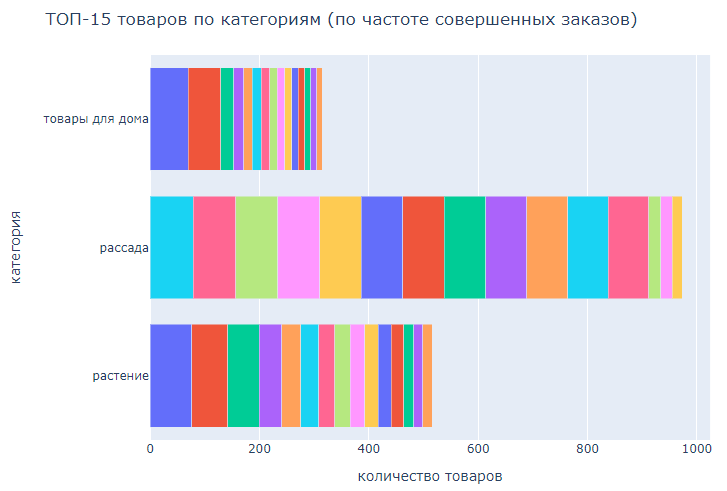

<div class="alert alert-info">
    
**📝 Комментарий Маши**
    
Наиболее популярные товары по частоте покупок в категории "товары для дома" - сумка-тележка; "рассада" - рассады кабачка и огурца; "растение" - пеларгония.
    
    
</div>

## Сегментация покупателей на основе истории их покупок

- Сформировать сегменты с помощью RFM-метода на основе группировки покупателей по истории их транкзаций: давности, частоты покупок и потраченных средств на покупки.

In [41]:
# создание датафрейма для RFM-анализа 
RFM_data = data[['customer_id', 'order_id', 'date', 'price']] 

In [42]:
# сохранение в переменной даты последней транкзации
now = dt.datetime(2019,11,1) 

# конвертация типа столбца с датами в тип даты 
RFM_data['date'] = pd.to_datetime(RFM_data['date']) 

# группировка по customer_id
RFM_table=RFM_data.groupby('customer_id').agg({'date': lambda x: (now - x.max()).days, #давность
                                                'order_id': lambda x: len(x.unique()), #частота
                                                'price': lambda x: x.sum()})    #денежная ценность

# преобразование типа столбца с датой в строковый
RFM_table['date'] = RFM_table['date'].astype(int) 

# переименование названий столбцов
RFM_table.rename(columns={'date': 'recency', 
                         'order_id': 'frequency',
                         'price': 'monetary_value'}, inplace=True) 

# вывод первых 10 строк таблицы
RFM_table.head(10) 

/tmp/ipykernel_177/1003122870.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,recency,frequency,monetary_value
customer_id,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,15,1,555.0
001cee7f-0b29-4716-b202-0042213ab038,257,1,442.0
00299f34-5385-4d13-9aea-c80b81658e1b,17,1,457.0
002d4d3a-4a59-406b-86ec-c3314357e498,277,1,1649.0
003bbd39-0000-41ff-b7f9-2ddaec152037,32,1,1162.0
004d24e9-4a6c-4d0e-8727-8391dfd4b43a,277,1,128.0
005ba170-45e8-42de-93f7-192481ae2659,366,1,1199.0
00bd74b1-2792-47db-a2f1-680a09ac5026,375,1,937.0
00c0f92a-121a-4883-a78d-2c7b5fe187de,250,1,134.0


In [43]:
# создание таблицы с квантилями для расчета показателя RFM
quantiles = RFM_table.quantile(q=[0.25,0.5,0.75]) 

# вывод первых таблицы
quantiles

,recency,frequency,monetary_value
0.25,108.25,1.0,164.00
0.50,211.00,1.0,550.50
0.75,294.00,1.0,1199.75


In [44]:
# преобразование квантилей в словарь
quantiles = quantiles.to_dict() 

# создание таблицы с сегментацией RFM
RFM_Segment = RFM_table.copy() 

# создание функции R_Class для RFM сегментации
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

# создание функции FM_Class для RFM сегментации
def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

# создание столбца с квартилями давности
RFM_Segment['R_Quartile'] = RFM_Segment['recency'].apply(R_Class, args=('recency',quantiles,)) 

# создание столбца с квартилями частоты
RFM_Segment['F_Quartile'] = RFM_Segment['frequency'].apply(FM_Class, args=('frequency',quantiles,)) 

# создание столбца с квартилями денежной ценности
RFM_Segment['M_Quartile'] = RFM_Segment['monetary_value'].apply(FM_Class, args=('monetary_value',quantiles,)) 

# создание столбца RFM классами
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str)

In [45]:
# создание таблицы с лучшими покупателями 
best_customers = RFM_Segment[RFM_Segment['RFMClass']=='444'].sort_values('monetary_value', ascending=False) 

# вывод таблицы
best_customers

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
73d1cd35-5e5f-4629-8cf2-3fda829d4e58,0,17,21713.0,4,4,4,444
126dac4d-6486-49ed-a1be-9fd55a38a9de,64,2,9148.0,4,4,4,444
facadcf2-2c13-4d8f-baa3-567821546534,104,2,7049.0,4,4,4,444
922f7c8c-9241-4d9a-a37e-1f7dd1b03568,42,2,5923.0,4,4,4,444
7b0b570c-16c7-4aed-b302-13fe1830d1e9,25,2,3223.0,4,4,4,444
e8204583-4d55-4724-ad3f-049c7db43bdd,55,3,3102.0,4,4,4,444
a16e499f-f295-4b6c-b846-aeed6477eb70,29,2,2961.0,4,4,4,444
6a86cc77-ef15-496f-b5d3-89005597ee5d,62,3,2932.0,4,4,4,444
b17d36a6-13b0-4896-815f-45ee6adfd23d,81,2,2752.0,4,4,4,444


In [46]:
# топ-10 лучших покупателей
best_customers_10 = best_customers.head(10)

In [47]:
# создание таблицы с покупателями на пороге оттока
outflow_customers = RFM_Segment[RFM_Segment['R_Quartile'] <= 2 ].sort_values('monetary_value', ascending=False) 

# вывод таблицы
outflow_customers  

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
c971fb21-d54c-4134-938f-16b62ee86d3b,239,126,134145.0,2,4,4,244
9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,367,1,43372.0,1,1,4,114
4d93d3f6-8b24-403b-a74b-f5173e40d7db,372,35,30539.0,1,4,4,144
e382d4c4-a4c9-44d3-97a0-a8868e122563,298,1,28973.0,1,1,4,114
2273b174-e223-415a-9be1-49d19abea06e,239,1,20695.0,2,1,4,214
...,...,...,...,...,...,...,...
caa57afd-dc3d-4098-b68b-f7de931e8149,219,1,20.0,2,1,1,211
bd74b48f-17ea-45f7-8c66-510665aad57f,263,1,20.0,2,1,1,211
42c5db22-6046-455b-a728-ff163a1b7808,380,1,19.0,1,1,1,111


In [48]:
# топ-10 покупателей на пороге оттока
outflow_customers_10 = outflow_customers.head(10)

In [49]:
# создание таблицы с потерянными покупателями 
lost_customers = RFM_Segment[RFM_Segment['RFMClass']=='111'].sort_values('recency',ascending=False) #создание таблицы с потерянными покупателями

# вывод таблицы
lost_customers 

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
0948b0c2-990b-4a11-b835-69ac4714b21d,395,1,38.0,1,1,1,111
161e1b98-45ba-4b4e-8236-e6e3e70f6f7c,395,1,82.0,1,1,1,111
1e17318f-c4f1-4d0f-8ee4-9bf976c5b4ef,393,1,127.0,1,1,1,111
6f614f8f-4e47-4b87-8594-fe2d2c3b7077,392,1,149.0,1,1,1,111
fc7d1558-6c08-413b-86a2-deec73d5fff7,391,1,149.0,1,1,1,111
...,...,...,...,...,...,...,...
0e6ed482-a9d9-4c94-a4ff-382502a08d98,308,1,127.0,1,1,1,111
8a01a2ca-f8d3-4403-bb3e-2e929dd84ebd,307,1,149.0,1,1,1,111
0bbff16a-75df-4947-a5ef-f577c031a19d,303,1,135.0,1,1,1,111


In [50]:
# топ-10 потерянных покупателей
lost_customers_10 = lost_customers.head(10)

In [51]:
#создание таблицы с лояльными покупателями
loyal_customers = RFM_Segment[RFM_Segment['F_Quartile'] >= 3 ].sort_values('monetary_value', ascending=False) 

# вывод таблицы
loyal_customers

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
c971fb21-d54c-4134-938f-16b62ee86d3b,239,126,134145.0,2,4,4,244
4d93d3f6-8b24-403b-a74b-f5173e40d7db,372,35,30539.0,1,4,4,144
ff31d802-dae6-484d-a3dc-c9723f1cb538,170,2,23992.0,3,4,4,344
73d1cd35-5e5f-4629-8cf2-3fda829d4e58,0,17,21713.0,4,4,4,444
639c4989-b0ab-412a-b7ec-be394cb2d372,360,3,12095.0,1,4,4,144
...,...,...,...,...,...,...,...
2f639db6-6ce7-426b-9a6d-edbb9025463c,28,2,80.0,4,4,1,441
41117d9d-94f7-4145-a8c9-cb6675ce7674,202,3,70.0,3,4,1,341
f1cb90a3-c0d7-463b-bf85-a17711939a69,355,2,67.0,1,4,1,141


In [52]:
# топ-10 лояльных покупателей
loyal_customers_10 = loyal_customers.head(10)

<div class="alert alert-info">
    
**📝 Комментарий Маши**
    
Сегментация покупателей была произведена по RFM-методу.
    
RFM — это метод, используемый для анализа потребительской ценности. Он группирует клиентов на основе истории их транзакций:
- Recency (Давность) — Как давно клиент совершил покупку?
- Frequency (Частота) — Как часто они совершают покупки?
- Monetary Value (Денежная ценность) — Сколько они тратят?

В итоге были выделены сегменты лучших клиентов (кто покупают часто, на большие суммы и посетили интернет-магазин совсем недавно) (20 покупателей), лояльных (хорошие клиенты, которые уже оценили преимущества интернет-магазина) (145); на пороге оттока (нечасто совершали покупки и давно не возвращались) (1224); потерянные (совершили одну покупку и не вернулись) (101).

</div>

## Формулировка и проверка статистических гипотез

***Нулевая гипотеза*** - есть cтатистически значимые различия между выборками лучших и лояльных покупателей по денежной ценности.

***Альтернативная гипотеза*** - различий между выборками нет.

Считаем статистику в стандартных отклонениях стандартного нормального распределения с помощью z-теста Фишера.

Уровень статистической значимости - 5-процентная (0.05)

In [53]:
# критический уровень статистической значимости
alpha = 0.05

successes = np.array(best_customers_10['monetary_value'])
trials = np.array(loyal_customers_10['monetary_value'])

# конверсия в первой группе:
p1 = successes[0] / trials[0]
# конверсия во второй группе:
p2 = successes[1] / trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = stats.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2
 
print('p-значение:',p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
    
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.")

p-значение: 0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


***Нулевая гипотеза*** - есть cтатистически значимые различия между выборками покупателей на пороге оттока и потерянными покупателями по давности покупок.

***Альтернативная гипотеза*** - различий между выборками нет.

Считаем статистику в стандартных отклонениях стандартного нормального распределения с помощью z-теста Фишера.

Уровень статистической значимости - 5-процентная (0.05)

In [54]:
# критический уровень статистической значимости
alpha = 0.05

successes = np.array(outflow_customers_10['recency'])
trials = np.array(lost_customers_10['recency'])

# конверсия в первой группе:
p1 = successes[0] / trials[0]
# конверсия во второй группе:
p2 = successes[1] / trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = stats.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2
 
print('p-значение:',p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
    
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.")

p-значение: 0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


- Подготовка и создание датасета

In [55]:
# таблица с лучшими покупателями
best_10_df = data.query('customer_id in ["73d1cd35-5e5f-4629-8cf2-3fda829d4e58", "126dac4d-6486-49ed-a1be-9fd55a38a9de", \
                        "facadcf2-2c13-4d8f-baa3-567821546534", "922f7c8c-9241-4d9a-a37e-1f7dd1b03568", "7b0b570c-16c7-4aed-b302-13fe1830d1e9", \
                        "e8204583-4d55-4724-ad3f-049c7db43bdd", "a16e499f-f295-4b6c-b846-aeed6477eb70", "6a86cc77-ef15-496f-b5d3-89005597ee5d", \
                        "b17d36a6-13b0-4896-815f-45ee6adfd23d", "399da134-5db6-4861-89fc-6595e7583e98"]')

# количество заказов и общая сумма покупок по айди покупателя
best_10_df = best_10_df.groupby('customer_id')['order_id', 'price'].agg({'order_id':'count', 'price':'sum'}).reset_index()

# средняя сумма заказа
best_10_df['average'] = best_10_df['price'] / best_10_df['order_id']

# вывод таблицы
best_10_df

/tmp/ipykernel_177/331965576.py:8: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,customer_id,order_id,price,average
0,126dac4d-6486-49ed-a1be-9fd55a38a9de,2,9148.0,4574.000000
1,399da134-5db6-4861-89fc-6595e7583e98,2,2736.0,1368.000000
2,6a86cc77-ef15-496f-b5d3-89005597ee5d,24,2932.0,122.166667
3,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,18,21713.0,1206.277778
4,7b0b570c-16c7-4aed-b302-13fe1830d1e9,2,3223.0,1611.500000
5,922f7c8c-9241-4d9a-a37e-1f7dd1b03568,3,5923.0,1974.333333
6,a16e499f-f295-4b6c-b846-aeed6477eb70,2,2961.0,1480.500000
7,b17d36a6-13b0-4896-815f-45ee6adfd23d,8,2752.0,344.000000
8,e8204583-4d55-4724-ad3f-049c7db43bdd,3,3102.0,1034.000000
9,facadcf2-2c13-4d8f-baa3-567821546534,2,7049.0,3524.500000


In [56]:
# таблица с лояльными покупателями
loyal_10_df = data.query('customer_id in ["c971fb21-d54c-4134-938f-16b62ee86d3b", "4d93d3f6-8b24-403b-a74b-f5173e40d7db",\
                         "ff31d802-dae6-484d-a3dc-c9723f1cb538", "73d1cd35-5e5f-4629-8cf2-3fda829d4e58",\
                         "639c4989-b0ab-412a-b7ec-be394cb2d372", "86c97bf1-c834-423e-9e38-8acda68f97e8",\
                         "a9089b7e-e6a5-48f9-9b76-48693b63a092", "02adb72a-3067-45e9-a3b5-f93d79d7496a",\
                         "126dac4d-6486-49ed-a1be-9fd55a38a9de", "facadcf2-2c13-4d8f-baa3-567821546534"]')

# количество заказов и общая сумма покупок по айди покупателя
loyal_10_df = loyal_10_df.groupby('customer_id')['order_id', 'price'].agg({'order_id':'count', 'price':'sum'}).reset_index()

# средняя сумма заказа
loyal_10_df['average'] = loyal_10_df['price'] / loyal_10_df['order_id']

# вывод таблицы
loyal_10_df

/tmp/ipykernel_177/1997764837.py:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,customer_id,order_id,price,average
0,02adb72a-3067-45e9-a3b5-f93d79d7496a,2,10723.0,5361.500000
1,126dac4d-6486-49ed-a1be-9fd55a38a9de,2,9148.0,4574.000000
2,4d93d3f6-8b24-403b-a74b-f5173e40d7db,47,30539.0,649.765957
3,639c4989-b0ab-412a-b7ec-be394cb2d372,4,12095.0,3023.750000
4,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,18,21713.0,1206.277778
5,86c97bf1-c834-423e-9e38-8acda68f97e8,2,11548.0,5774.000000
6,a9089b7e-e6a5-48f9-9b76-48693b63a092,3,11495.0,3831.666667
7,c971fb21-d54c-4134-938f-16b62ee86d3b,144,134145.0,931.562500
8,facadcf2-2c13-4d8f-baa3-567821546534,2,7049.0,3524.500000
9,ff31d802-dae6-484d-a3dc-c9723f1cb538,8,23992.0,2999.000000


In [57]:
# таблица с покупателями на пороге оттока
outlow_10_df = data.query('customer_id in ["c971fb21-d54c-4134-938f-16b62ee86d3b", "9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f", \
                        "4d93d3f6-8b24-403b-a74b-f5173e40d7db", "e382d4c4-a4c9-44d3-97a0-a8868e122563", \
                        "2273b174-e223-415a-9be1-49d19abea06e", "b731df05-98fa-4610-8496-716ec530a02c", \
                        "5bee7748-a089-4d7c-a1ad-075cd8846a41", "639c4989-b0ab-412a-b7ec-be394cb2d372", \
                        "eb04c06f-bee9-45bd-9392-4addbc54952f", "86c97bf1-c834-423e-9e38-8acda68f97e8"]')

# количество заказов и общая сумма покупок по айди покупателя
outlow_10_df = outlow_10_df.groupby('customer_id')['order_id', 'price'].agg({'order_id':'count', 'price':'sum'}).reset_index()

# средняя сумма заказа
outlow_10_df['average'] = outlow_10_df['price'] / outlow_10_df['order_id']

# вывод таблицы
outlow_10_df

/tmp/ipykernel_177/1250229547.py:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,customer_id,order_id,price,average
0,2273b174-e223-415a-9be1-49d19abea06e,5,20695.0,4139.000000
1,4d93d3f6-8b24-403b-a74b-f5173e40d7db,47,30539.0,649.765957
2,5bee7748-a089-4d7c-a1ad-075cd8846a41,4,14396.0,3599.000000
3,639c4989-b0ab-412a-b7ec-be394cb2d372,4,12095.0,3023.750000
4,86c97bf1-c834-423e-9e38-8acda68f97e8,2,11548.0,5774.000000
5,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,50,43372.0,867.440000
6,b731df05-98fa-4610-8496-716ec530a02c,5,16495.0,3299.000000
7,c971fb21-d54c-4134-938f-16b62ee86d3b,144,134145.0,931.562500
8,e382d4c4-a4c9-44d3-97a0-a8868e122563,7,28973.0,4139.000000
9,eb04c06f-bee9-45bd-9392-4addbc54952f,9,12030.0,1336.666667


In [58]:
# таблица с потерянными покупателями
lost_10_df = data.query('customer_id in ["0948b0c2-990b-4a11-b835-69ac4714b21d", "161e1b98-45ba-4b4e-8236-e6e3e70f6f7c", \
                        "1e17318f-c4f1-4d0f-8ee4-9bf976c5b4ef", "6f614f8f-4e47-4b87-8594-fe2d2c3b7077", \
                        "fc7d1558-6c08-413b-86a2-deec73d5fff7", "ec7d88d5-2a52-4843-80d7-1f193f1c44e1", \
                        "b6f177c7-20f6-4e4e-87ca-484908f8e729", "bc59104e-73fb-4057-a65d-2325dc4b69dd", \
                        "4ca25cd8-3ede-4cfd-81d8-4f1564b45568", "3e2c8193-3fc0-4607-a59f-bcdf169ce351"]')

# количество заказов и общая сумма покупок по айди покупателя
lost_10_df = lost_10_df.groupby('customer_id')['order_id', 'price'].agg({'order_id':'count', 'price':'sum'}).reset_index()

# средняя сумма заказа
lost_10_df['average'] = lost_10_df['price'] / lost_10_df['order_id']

# вывод таблицы
lost_10_df

/tmp/ipykernel_177/264463473.py:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,customer_id,order_id,price,average
0,0948b0c2-990b-4a11-b835-69ac4714b21d,1,38.0,38.0
1,161e1b98-45ba-4b4e-8236-e6e3e70f6f7c,1,82.0,82.0
2,1e17318f-c4f1-4d0f-8ee4-9bf976c5b4ef,1,127.0,127.0
3,3e2c8193-3fc0-4607-a59f-bcdf169ce351,2,102.0,51.0
4,4ca25cd8-3ede-4cfd-81d8-4f1564b45568,1,20.0,20.0
5,6f614f8f-4e47-4b87-8594-fe2d2c3b7077,1,149.0,149.0
6,b6f177c7-20f6-4e4e-87ca-484908f8e729,1,28.0,28.0
7,bc59104e-73fb-4057-a65d-2325dc4b69dd,1,142.0,142.0
8,ec7d88d5-2a52-4843-80d7-1f193f1c44e1,1,149.0,149.0
9,fc7d1558-6c08-413b-86a2-deec73d5fff7,1,149.0,149.0


***Нулевая гипотеза*** - есть cтатистически значимые различия между средними чеками лучших и лояльных покупателей.

***Альтернативная гипотеза*** - различий между выборками нет.

Считаем статистику в стандартных отклонениях стандартного нормального распределения с помощью z-теста Фишера.

Уровень статистической значимости - 5-процентная (0.05)

In [59]:
# критический уровень статистической значимости
alpha = 0.05

successes = np.array(best_10_df['average'])
trials = np.array(loyal_10_df['average'])

# конверсия в первой группе:
p1 = successes[0] / trials[0]
# конверсия во второй группе:
p2 = successes[1] / trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = stats.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2
 
print('p-значение:',p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
    
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.")

p-значение: 0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


***Нулевая гипотеза*** - есть cтатистически значимые различия между средними чеками потерянных покупателей и покупателей на пороге оттока.

***Альтернативная гипотеза*** - различий между выборками нет.

Считаем статистику в стандартных отклонениях стандартного нормального распределения с помощью z-теста Фишера.

Уровень статистической значимости - 5-процентная (0.05)

In [60]:
# критический уровень статистической значимости
alpha = 0.05

successes = np.array(lost_10_df['average'])
trials = np.array(outlow_10_df['average'])

# конверсия в первой группе:
p1 = successes[0] / trials[0]
# конверсия во второй группе:
p2 = successes[1] / trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = stats.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2
 
print('p-значение:',p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
    
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.")

p-значение: 0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


<div class="alert alert-info">
    
**📝 Комментарий Маши**
    
При проверке статистических гипотез выявлено:
- Наличие значимой разницы между выборками лучших и лояльных покупателей по денежной ценности; 
- Также существуют статистически значимые различия между выборками покупателей на пороге оттока и потерянными покупателями по давности покупок.
- Между средними чеками лучших и лояльных покупателей есть разница, как и между средними чеками потерянных покупателей и покупателей на пороге оттока.

</div>

## Выводы
    
- Октябрь 2018 г. отличился наиболее высокими показателями выручки за весь период, в августе 2019 г. же наблюдается наиболее низкая выручка. Темпы и значения выручки не имеют явных трендов;
- Наибольшее количество заказов также было совершено в октябре 2018. В декабре 2018 и мае 2019 были покупатели, которые совершили до 3 заказов (при среднем количестве заказов - 1). Количество заказов также не имеет какой-либо зависимости от месяца;
- Существует заметная (умеренная) зависимость количества заказов от их денежного эквивалента;
- Больше всего продано товаров категории "товары для дома". Наблюдается преобладание продаж "рассады" в посевное время, "растения" же пользуются популярностью в марте. Наиболее популярные товары в категориях: "товары для дома" - сумка-тележка, муляж яблоко и дверные пружины; "рассада" - рассада кабачков и огурцов; "растение" - пеларгония;
- В ходе RFM-анализа были выделены сегменты лучших клиентов - 20 покупателей, лояльных - 145, на пороге оттока - 1224 и потерянных - 101;
- Выборки лучших и лояльных покупателей по денежной ценности статистически различаются, как и средние чеки. 
- Выборки покупателей на пороге оттока и потерянных имеют различия по давности покупок и по средним чекам.